In [2]:
!pip install fastai --upgrade
!pip install -q jmd_imagescraper
!pip install voila
!jupyter serverextension enable voila --sys-prefix

     |████████████████████████████████| 194kB 8.6MB/s 
     |████████████████████████████████| 61kB 7.8MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
     |████████████████████████████████| 1.9MB 9.1MB/s 
     |████████████████████████████████| 112kB 49.7MB/s 
     |████████████████████████████████| 552kB 50.1MB/s 
     |████████████████████████████████| 194kB 48.8MB/s 
     |████████████████████████████████| 71kB 12.6MB/s 
     |████████████████████████████████| 102kB 15.1MB/s 
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7667 sha256=afa2ca715eec23e86eea971be3c1a336a07cf33a2dac0625ccda00a6f810f3d5
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built contextvars
ERROR: jupyter-server 1.2.2 has requirement tornado>=6.1.0, but you'll have tornado 5.1.1 which is incompatible.
  Found existing installat

Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?


In [1]:
import fastai
from fastai.vision.widgets import *
from jmd_imagescraper.core import *
from pathlib import Path
from jmd_imagescraper.imagecleaner import *
from PIL import Image

In [2]:
plant_types = ["wild grapes", "canadian moonseed", "poison hemlock", "wild carrot"]
path = Path().cwd()/"poisonous plants" #assigns path to current working directory

In [3]:
# using DuckDuckGo to find images and download them
imgs = duckduckgo_search(path,"wild grapes", "wild grapes", max_results=150) 

Duckduckgo search: wild grapes


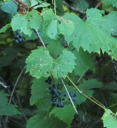

In [4]:
#Take a look at the first image downloaded
im = Image.open(imgs[10])
im.to_thumb(128,128)

In [5]:
#download images of the other types of bears
duckduckgo_search(path,"canadian moonseed", "canadian moonseed", max_results=150) 
duckduckgo_search(path,"poison hemlock", "poison hemlock", max_results=150)
duckduckgo_search(path,"wild carrot", "wild carrot", max_results=150)   

Duckduckgo search: canadian moonseed


Duckduckgo search: poison hemlock


Duckduckgo search: wild carrot


[Path('/content/poisonous plants/wild carrot/001_1ca1bd3d.jpg'),
 Path('/content/poisonous plants/wild carrot/002_77411d5b.jpg'),
 Path('/content/poisonous plants/wild carrot/003_754afc7c.jpg'),
 Path('/content/poisonous plants/wild carrot/004_24106529.jpg'),
 Path('/content/poisonous plants/wild carrot/005_45a94386.jpg'),
 Path('/content/poisonous plants/wild carrot/006_3f0f7db6.jpg'),
 Path('/content/poisonous plants/wild carrot/007_1685072e.jpg'),
 Path('/content/poisonous plants/wild carrot/008_86d184cd.jpg'),
 Path('/content/poisonous plants/wild carrot/009_01a9e6da.jpg'),
 Path('/content/poisonous plants/wild carrot/010_1ca2f9b9.jpg'),
 Path('/content/poisonous plants/wild carrot/011_7c1d5a82.jpg'),
 Path('/content/poisonous plants/wild carrot/012_77a9dad9.jpg'),
 Path('/content/poisonous plants/wild carrot/013_40fb2444.jpg'),
 Path('/content/poisonous plants/wild carrot/014_f8ad4326.jpg'),
 Path('/content/poisonous plants/wild carrot/015_82d4ee06.jpg'),
 Path('/content/poisonous

In [6]:
!pip install fastbook
import fastbook
from fastbook import*
fastbook.setup_book()

     |████████████████████████████████| 727kB 7.4MB/s 
     |████████████████████████████████| 1.2MB 15.6MB/s 
     |████████████████████████████████| 51kB 9.4MB/s 
     |████████████████████████████████| 460kB 35.0MB/s 
ERROR: voila 0.2.6 has requirement nbconvert<7,>=6.0.0, but you'll have nbconvert 5.6.1 which is incompatible.
ERROR: jupyter-server 1.2.2 has requirement tornado>=6.1.0, but you'll have tornado 5.1.1 which is incompatible.
  Found existing installation: nbconvert 6.0.7
    Uninstalling nbconvert-6.0.7:
      Successfully uninstalled nbconvert-6.0.7
Mounted at /content/gdrive


In [7]:
fns = get_image_files(path)
fns #check that our folders has image files as we'd expect

(#600) [Path('/content/poisonous plants/wild carrot/061_723819e9.jpg'),Path('/content/poisonous plants/wild carrot/040_5e8c494c.jpg'),Path('/content/poisonous plants/wild carrot/145_7f3eb145.jpg'),Path('/content/poisonous plants/wild carrot/083_73ad6c70.jpg'),Path('/content/poisonous plants/wild carrot/052_2bf6523f.jpg'),Path('/content/poisonous plants/wild carrot/054_8366ad4a.jpg'),Path('/content/poisonous plants/wild carrot/021_b648aa0f.jpg'),Path('/content/poisonous plants/wild carrot/012_77a9dad9.jpg'),Path('/content/poisonous plants/wild carrot/006_3f0f7db6.jpg'),Path('/content/poisonous plants/wild carrot/090_818d806d.jpg')...]

In [8]:
class DataLoaders(GetAttr):
  def __init__(self, *loaders):
    self.loaders = loaders
  def __getitem__(self, i):
    return self.loaders[i]
  train, valid = add_props(lambda i, self: self[i])

In [9]:
plants = DataBlock(
    blocks=(ImageBlock, CategoryBlock), #specify types for independent and dependent variables
    get_items=get_image_files, #takes a path and returns a list of all images in that path
    splitter = RandomSplitter(valid_pct = 0.2, seed = 1), # Create a validation and test set
    get_y=parent_label, # labels the images based on the foler they were in
    item_tfms=Resize(128) #resize images to a specific size
)

In [15]:
plants = plants.new(
    item_tfms = RandomResizedCrop(224,min_scale=0.5),
    batch_tfms= aug_transforms()
)

dls = plants.dataloaders(path)

learn = cnn_learner(dls, resnet34 ,metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.218012,1.309026,0.458333,00:04


epoch,train_loss,valid_loss,error_rate,time
0,1.298154,0.908277,0.291667,00:05
1,1.104782,0.759103,0.250000,00:05
2,0.887526,0.716961,0.233333,00:05
3,0.757396,0.704383,0.250000,00:05


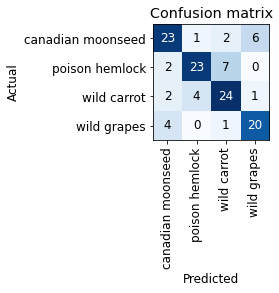

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [18]:
learn.export() #saves model archeticture and parameters

In [19]:
#checking that the file exists
path = Path()
path.ls(file_exts=".pkl")

(#1) [Path('export.pkl')]

In [20]:
#time to perform inference
learn_inf = load_learner(path/"export.pkl")

In [22]:
learn_inf.predict("/content/poisonous plants/wild carrot/001_1ca1bd3d.jpg")

('wild carrot',
 tensor(2),
 tensor([2.5353e-02, 1.0994e-01, 8.6390e-01, 8.0881e-04]))

In [23]:
photo_upload = widgets.FileUpload()
photo_upload

FileUpload(value={}, description='Upload')

In [24]:
img = PILImage.create(photo_upload.data[0])

In [25]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl:
  display(img.to_thumb(128,128))
out_pl

Output()

In [26]:
pred, pred_idx, probs = learn_inf.predict(img)

In [27]:
lbl_pred = widgets.Label()
lbl_pred.value = f"Prediction: {pred}; Probability: {probs[pred_idx]:.04f}"
lbl_pred

Label(value='Prediction: wild grapes; Probability: 0.9865')

In [28]:
btn_run = widgets.Button(description="Classify")
btn_run

Button(description='Classify', style=ButtonStyle())

In [29]:
def on_click_classify(change):
  img = PILImage.create(photo_upload.data[-1])
  out_pl.clear_output()
  with out_pl:
    display(img.to_thumb(224,224))
  pred, pred_idx, probs = learn_inf.predict(img)
  lbl_pred.value = f"Prediction: {pred}; Probability: {probs[pred_idx]:.04f}"

btn_run.on_click(on_click_classify)

In [30]:
VBox([widgets.Label("Upload your plant!"),
     photo_upload, btn_run, out_pl, lbl_pred])